<a href="https://colab.research.google.com/github/Karimby1/CMR_stage/blob/less_than_10/less_than_10_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.2 MB/s eta 0:00:00


In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/cmrcleann.csv'

# Lire avec le bon délimiteur
df = pd.read_csv(file_path, delimiter=';')

# Afficher les 5 premières lignes
df.head()


,Company,Product,RRS_Purchase,RRS_Sales,RECID,QTY,DatePhysical,TotalCostToEuro,TotalCostToUSD,TotalCostToGBP,TotalCostToLocal,UnitCostToEuro,UnitCostToUSD,UnitCostToGBP,UnitCostToLocal,MoisAchat
0,tun,CPN072945,Strangers,Strangers,5637310131,200.0,06/03/2020,89.074643,96.119735,74.407493,298.694,0.445373,0.480599,0.372037,1.49347,3
1,chn,CPN068320,Strangers,Strangers,5637144578,318.0,04/07/2019,15846.319510,17099.784720,13237.218340,123911.880,49.831193,53.772908,41.626473,389.66000,7
2,chn,CPN048672,Runners,Strangers,5637144610,100.0,12/06/2019,65.220727,70.379775,54.482115,510.000,0.652207,0.703798,0.544821,5.10000,6
3,chn,CPN022236,Strangers,Strangers,5637144617,10.0,27/06/2019,55.117909,59.477810,46.042729,431.000,5.511791,5.947781,4.604273,43.10000,6
4,chn,CPN053419,Runners,Strangers,5637144618,450.0,11/06/2019,523.684076,565.108192,437.459339,4095.000,1.163742,1.255796,0.972132,9.10000,6


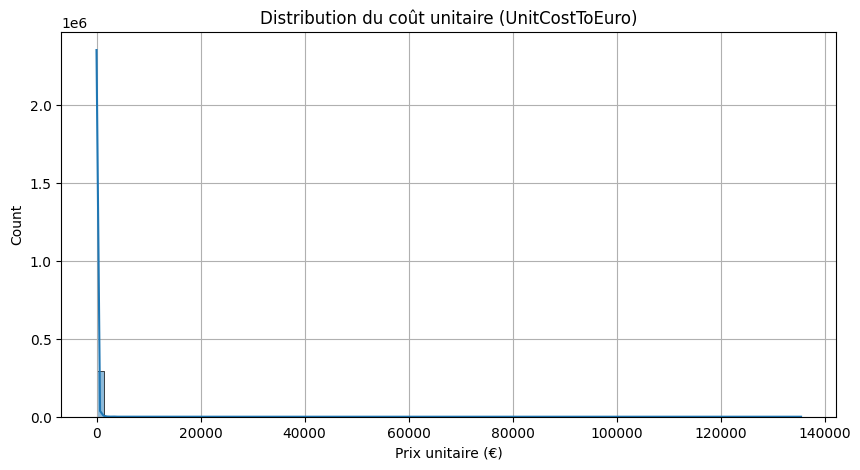

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['UnitCostToEuro'], bins=100, kde=True)
plt.title("Distribution du coût unitaire (UnitCostToEuro)")
plt.xlabel("Prix unitaire (€)")
plt.grid()
plt.show()


In [ ]:
# Définir des intervalles de prix
bins = [0, 10, 50, 100, 500, 1000, 5000, 10000, df['UnitCostToEuro'].max()]
labels = ['<10€', '10-50€', '50-100€', '100-500€', '500-1K€', '1K-5K€', '5K-10K€', '>10K€']

# Créer une nouvelle colonne pour catégoriser
df['PriceRange'] = pd.cut(df['UnitCostToEuro'], bins=bins, labels=labels, include_lowest=True)

# Compter combien de produits dans chaque tranche
range_counts = df['PriceRange'].value_counts().sort_index()

# Afficher
print("Répartition des produits par tranche de coût unitaire (€) :\n")
print(range_counts)


Répartition des produits par tranche de coût unitaire (€) :

PriceRange
<10€        173249
10-50€       59773
50-100€      19074
100-500€     30195
500-1K€       9931
1K-5K€        6415
5K-10K€        139
>10K€           73
Name: count, dtype: int64


In [ ]:
df_low10 = df[df['UnitCostToEuro'] < 10].copy()


In [ ]:
df_low10['DatePhysical'] = pd.to_datetime(df_low10['DatePhysical'], dayfirst=True)
df_low10['Year'] = df_low10['DatePhysical'].dt.year
df_low10['Month'] = df_low10['DatePhysical'].dt.month
df_low10['Quarter'] = df_low10['DatePhysical'].dt.quarter
df_low10['IsEndOfYear'] = df_low10['Month'].isin([11, 12]).astype(int)


In [ ]:
features = [
    'Product', 'Company', 'RRS_Purchase', 'RRS_Sales',
    'QTY', 'MoisAchat', 'Year', 'Month', 'Quarter', 'IsEndOfYear'
]

X = df_low10[features]
y = df_low10['UnitCostToEuro']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from catboost import CatBoostRegressor

cat_features = ['Product', 'Company', 'RRS_Purchase', 'RRS_Sales']

model = CatBoostRegressor(verbose=100, random_state=42)
model.fit(X_train, y_train, cat_features=cat_features)


Learning rate set to 0.08924
0:	learn: 2.5045455	total: 379ms	remaining: 6m 18s
100:	learn: 1.8053029	total: 11.4s	remaining: 1m 41s
200:	learn: 1.7599248	total: 23.5s	remaining: 1m 33s
300:	learn: 1.7321740	total: 33.1s	remaining: 1m 16s
400:	learn: 1.7075228	total: 42s	remaining: 1m 2s
500:	learn: 1.6898007	total: 52.8s	remaining: 52.6s
600:	learn: 1.6769931	total: 1m 3s	remaining: 42.3s
700:	learn: 1.6675762	total: 1m 13s	remaining: 31.5s
800:	learn: 1.6597603	total: 1m 24s	remaining: 20.9s
900:	learn: 1.6536588	total: 1m 35s	remaining: 10.5s
999:	learn: 1.6468311	total: 1m 45s	remaining: 0us


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"✅ MAE : {mae:.4f} € | RMSE : {rmse:.4f} €")


✅ MAE : 1.0086 € | RMSE : 1.6057 €


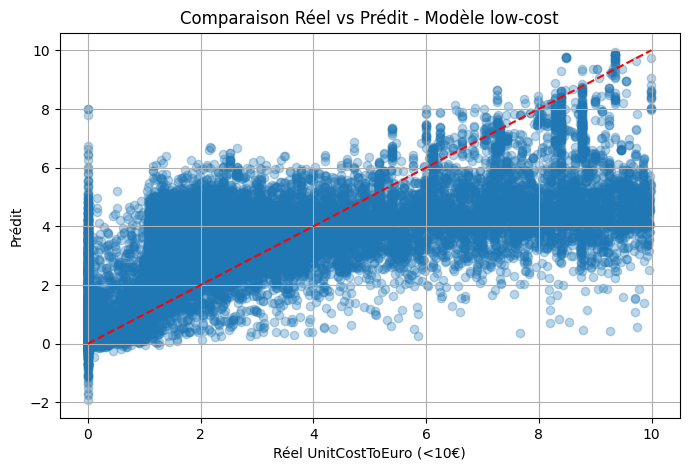

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Réel UnitCostToEuro (<10€)")
plt.ylabel("Prédit")
plt.title("Comparaison Réel vs Prédit - Modèle low-cost")
plt.grid()
plt.show()


In [ ]:
print("Statistiques sur la cible (UnitCostToEuro < 10€) :")
print(f"- Moyenne  : {y_test.mean():.4f} €")
print(f"- Médiane  : {y_test.median():.4f} €")
print(f"- Écart-type : {y_test.std():.4f} €")
print(f"- Variance   : {y_test.var():.4f} €")


Statistiques sur la cible (UnitCostToEuro < 10€) :
- Moyenne  : 2.1696 €
- Médiane  : 1.0800 €
- Écart-type : 2.6093 €
- Variance   : 6.8087 €


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² : {r2:.4f}")


R² : 0.6213
